# Prediciting medical no-shows: Data Undertanding & EDA
ML Project (group 7)

### Importing necessary libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [2]:
df = pd.read_csv("KaggleV2-May-2016.csv")

### Exploratory data analysis

In [3]:
print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Based on the head of the dataset, patientID, appointmentID, ScheduledDay and AppointmentDay are not interesting to see the unique value counts of and they were therefore ignored before look at the value counts.


In [6]:
columns_useful = df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], axis=1).columns
for column in columns_useful:
    print(column)
    print(df[column].value_counts().sort_index())

Gender
F    71840
M    38687
Name: Gender, dtype: int64
Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64
Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: Neighbourhood, Length: 81, dtype: int64
Scholarship
0    99666
1    10861
Name: Scholarship, dtype: int64
Hipertension
0    88726
1    21801
Name: Hipertension, dtype: int64
Diabetes
0    102584
1      7943
Name: Diabetes, dtype: int64
Alcoholism
0    107167
1      3360
Name: Alcoholism, dtype: int64
Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64
SMS_received
0    75045
1    35482

### Variable manipulation
To be able to do an exploratory data analysis, some data types had to be changed. fter the inital EDA, it was found that lead_days could be a useful varible. We created two new helper variables only_date_appointment_day and onlye_date_scheduled_day to help determine the lead_days, those helper variables are not considered for the final model. 

In [7]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['Gender'] = df['Gender'].map({'F': True, 'M': False})
df['No-show'] = df['No-show'].map({'Yes': True, 'No': False})
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Hipertension'] = df['Hipertension'].astype(bool)
df['Alcoholism'] = df['Alcoholism'].astype(bool)
df['SMS_received'] = df['SMS_received'].astype(bool)
df['handicap_boolean'] = df['Handcap'].replace([2, 3, 4], 1).astype(bool)

In [8]:
df['only_date_appointment_day'] = df['AppointmentDay'].dt.date
df['only_date_scheduled_day'] = df['ScheduledDay'].dt.date
df['lead_days'] = (df['only_date_appointment_day'] - df['only_date_scheduled_day']).dt.days.astype(np.int64)
df = df.drop('only_date_appointment_day', axis = 1)
df = df.drop('only_date_scheduled_day', axis = 1)

#### Helper functions

In [9]:
sns.set_palette("Set2")

def draw_plot_nonbinary(variable):
    sns.histplot(df, x =variable, kde = False)

def draw_plot_binary(variable, left_axis, right_axis, title):
    counts = df.groupby(variable)['No-show'].mean() * 100
    sns.countplot(data=df, x=variable, hue='No-show')
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Number of appointments')
    plt.gca().set_xticklabels([left_axis, right_axis])
    for i in range(len(counts)):
        plt.text(i, df['No-show'][df[variable]==counts.index[i]].value_counts()[1], 
                f"{counts[i]:.2f}%", ha='left')
    plt.show()

    sns.set_palette("Set2")

**Gender**

Percentage True     64.997693
False    35.002307
Name: Gender, dtype: float64


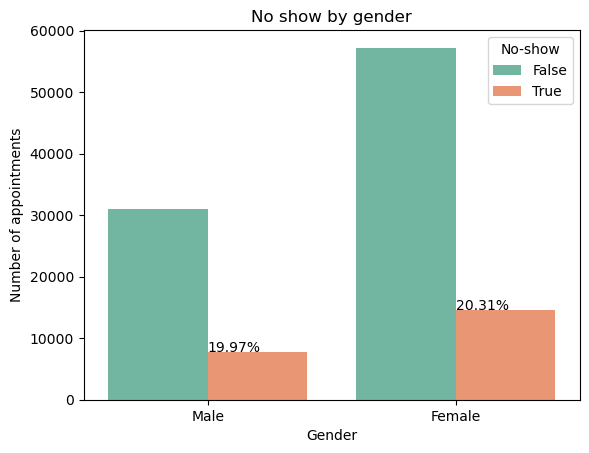

In [10]:
gender_distribution = df['Gender'].value_counts(normalize=True) * 100
print("Percentage", gender_distribution)
draw_plot_binary('Gender', 'Male', 'Female', 'No show by gender')

**Age**

<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age'>

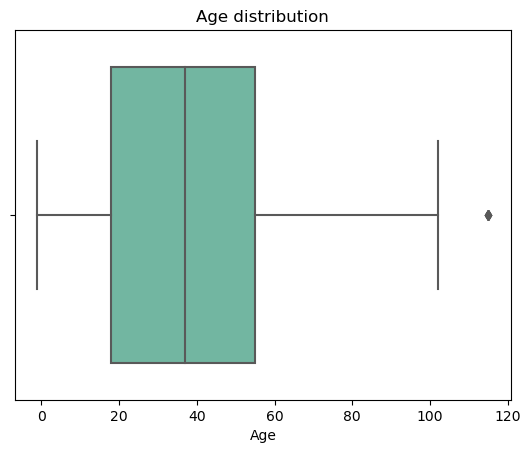

In [11]:
plt.title("Age distribution")
sns.boxplot(x=df["Age"])

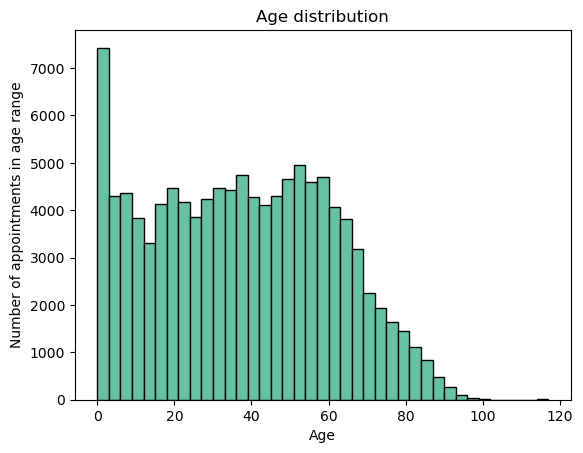

In [12]:
plt.hist(df['Age'], bins=range(0, 120, 3), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of appointments in age range')
plt.title('Age distribution')
plt.show()

**Scholarship**

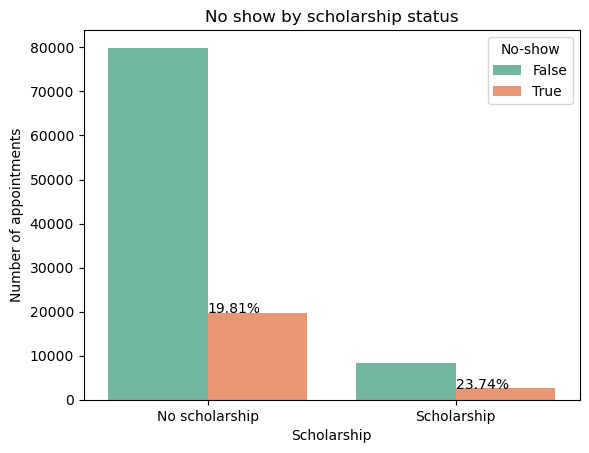

In [13]:
draw_plot_binary('Scholarship', 'No scholarship', 'Scholarship', 'No show by scholarship status')

**Handicap**

In [14]:
print(df['Handcap'].value_counts())

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


Because of the low number of instances that have more than 1 handicap, we chose to count handicap as a boolean. 


**Handicap_boolean, Alocholism, Hypertension and Diabetes**

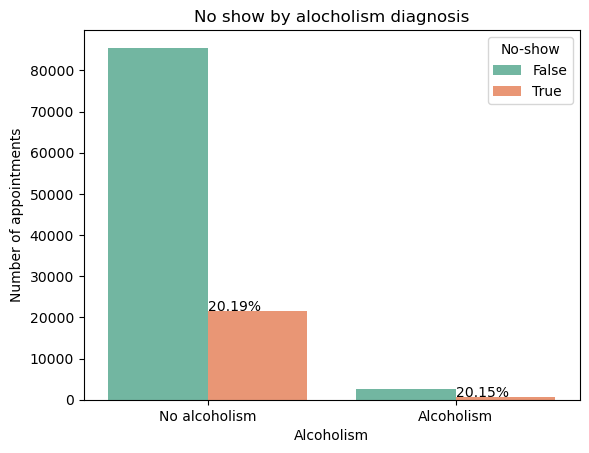

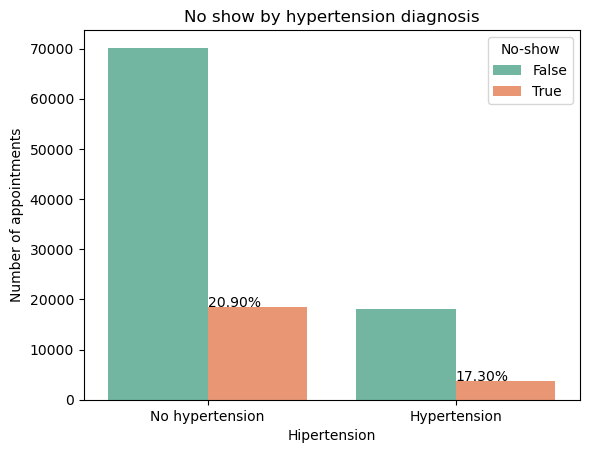

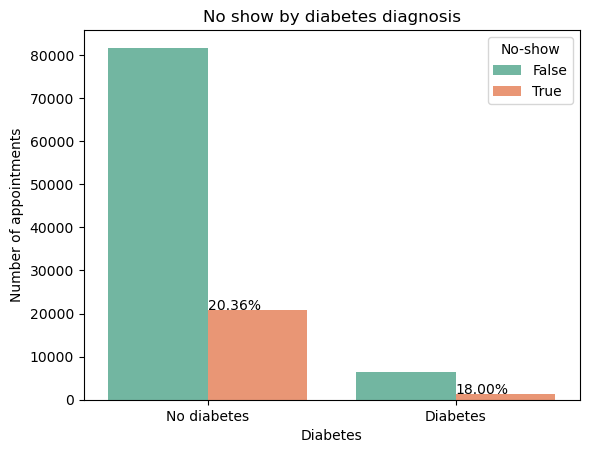

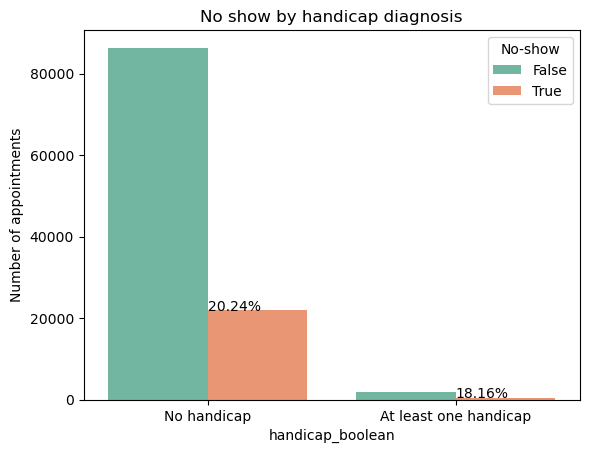

In [15]:
draw_plot_binary('Alcoholism', 'No alcoholism', 'Alcoholism', 'No show by alocholism diagnosis')
draw_plot_binary('Hipertension', 'No hypertension', 'Hypertension', 'No show by hypertension diagnosis')
draw_plot_binary('Diabetes', 'No diabetes', 'Diabetes', 'No show by diabetes diagnosis')
draw_plot_binary('handicap_boolean', 'No handicap', 'At least one handicap', 'No show by handicap diagnosis')

**SMS_received**

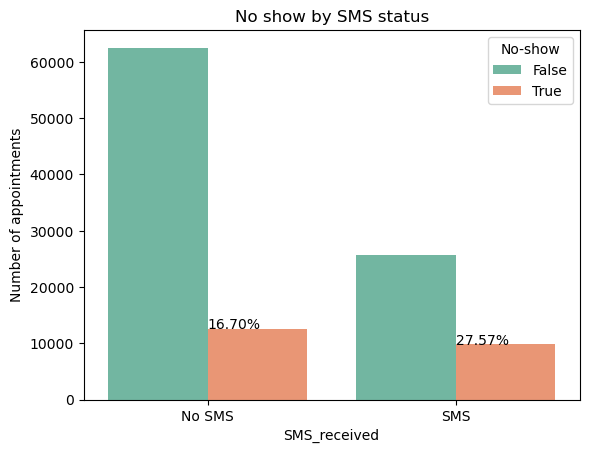

In [16]:
draw_plot_binary('SMS_received', 'No SMS', 'SMS', 'No show by SMS status')

**Neighborhood_analysis**

The neigheirhoods no-show count was exported, so that the data could be analysed using QGIS(Geographic Information Systems software). The fourth line is commented out so that no file will be generated everytime this code is run.

In [17]:
neighborhood_df = df.groupby('Neighbourhood').mean('No-show')
neighborhood_df = neighborhood_df[['No-show']]
print(neighborhood_df.sort_values('No-show'))
# neighborhood_df.to_csv('neighbourhood_no_show.csv')

                              No-show
Neighbourhood                        
PARQUE INDUSTRIAL            0.000000
ILHA DO BOI                  0.085714
AEROPORTO                    0.125000
MÁRIO CYPRESTE               0.145553
SOLON BORGES                 0.147122
...                               ...
ITARARÉ                      0.262664
SANTA CLARA                  0.264822
SANTA CECÍLIA                0.274554
SANTOS DUMONT                0.289185
ILHAS OCEÂNICAS DE TRINDADE  1.000000

[81 rows x 1 columns]


**Lead days**

In [18]:
print(df['lead_days'].value_counts().nlargest(20))
print(df['lead_days'].sort_values())
print(df.info())

0     38563
2      6725
4      5290
1      5213
7      4906
6      4037
5      3277
14     2913
3      2737
8      2332
21     1861
28     1706
13     1682
9      1605
15     1503
10     1391
20     1187
22     1173
16     1151
12     1115
Name: lead_days, dtype: int64
71533      -6
72362      -1
64175      -1
55226      -1
27033      -1
         ... 
102791    179
102790    179
102789    179
102786    179
102795    179
Name: lead_days, Length: 110527, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   PatientId         110527 non-null  float64            
 1   AppointmentID     110527 non-null  int64              
 2   Gender            110527 non-null  bool               
 3   ScheduledDay      110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay    110527 non-null  datetime64[ns, UTC]

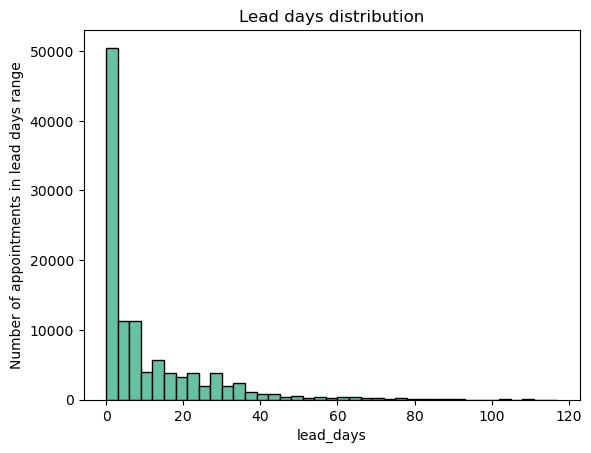

In [19]:
plt.hist(df['lead_days'], bins=range(0, 120, 3), edgecolor='black')
plt.ylabel('Number of appointments in lead days range')
plt.xlabel('lead_days')
plt.title('Lead days distribution')
plt.show()

#### Correlation matrix
This correlation matrix is with the inital variable set

<AxesSubplot:>

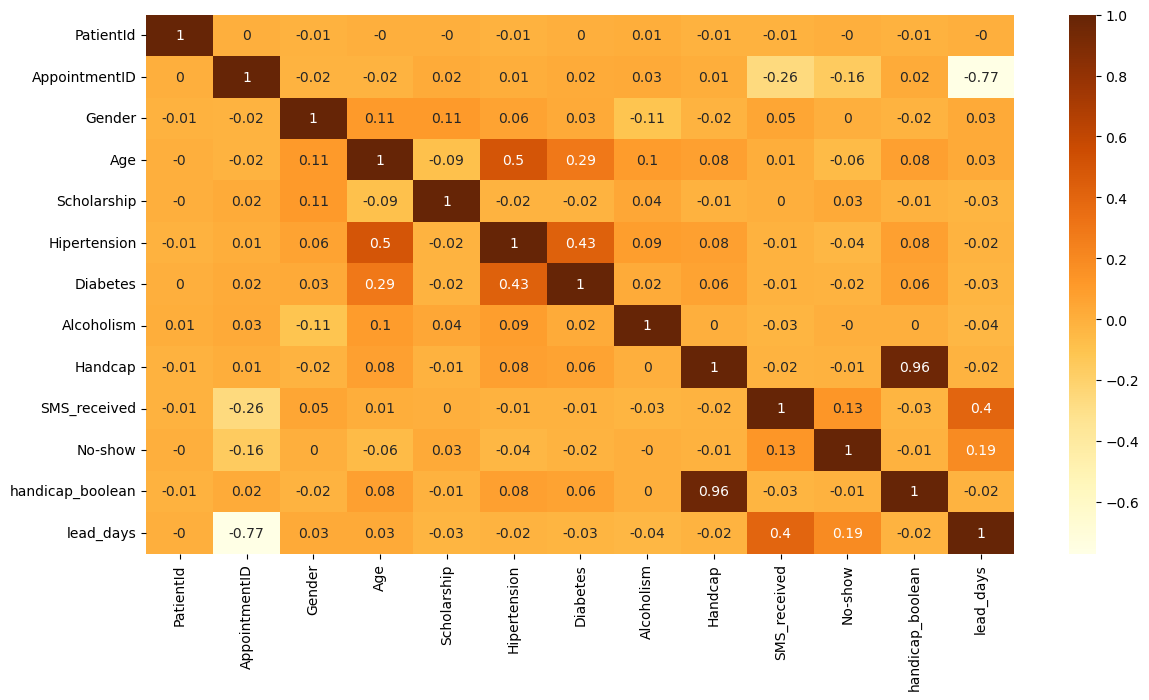

In [20]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

#### Age and lead days as categorical variables

Various age categories have been considered as the literature review revealed that age can be a strong predictor in relation to certain age groups, rather than age as a whole. 

**PatientID and AppointmentID, appointment history**

In [21]:
not_unique_patient_id = df['PatientId'][df['PatientId'].duplicated()]
df['previous_app'] = df['PatientId'].isin(not_unique_patient_id).astype(int)
print(df['previous_app'].value_counts())

print('Number of unique PatientId values:', df['PatientId'].nunique())
print('Number of unique AppointmentId values:', df['AppointmentID'].nunique())
print(df['PatientId'].value_counts())

df2 = df.groupby('PatientId')['AppointmentID'].count().reset_index()
df2.columns = ['PatientId', 'number_of_appointments']
print(df2.sort_values('number_of_appointments' , ascending = False))

df3 = df.groupby('PatientId')['No-show'].mean().reset_index()
df3.columns = ['PatientId', 'average_no_show']
print(df3.sort_values('average_no_show'))

merge1 = pd.merge(df, df2, how = 'left', on = 'PatientId')
merge2 = pd.merge(merge1, df3, how = 'left', on = 'PatientId')
merge2['no_prev_appointment'] = merge2['number_of_appointments'] == 1
merge2['prev_appointment_show'] = (merge2['number_of_appointments'] > 1) & (merge2['average_no_show'] == 0)
merge2['prev_appointment_no_show'] = (merge2['number_of_appointments'] > 1) & (merge2['average_no_show'] != 0)
df = merge2

1    72607
0    37920
Name: previous_app, dtype: int64
Number of unique PatientId values: 62299
Number of unique AppointmentId values: 110527
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64
          PatientId  number_of_appointments
59336  8.221459e+14                      88
2840   9.963767e+10                      84
30055  2.688613e+13                      70
31569  3.353478e+13                      65
60232  8.713749e+14                      62
...             ...                     ...
25807  9.886985e+12                       1
25808  9.887131e+12                       1
25811  9.887668e+12                       1
25813  9.888132e+12                       1
62298  9.999816e+14                       1

[62299 rows x 2 columns]
          PatientId  average_no_show
0      3.9217

In [22]:
df['Age_0_4'] = (df['Age'] <= 4)
df['Age_5_12'] = (df['Age'] > 4) & (df['Age'] <= 12)
df['Age_13_19'] = (df['Age'] > 12) & (df['Age'] <= 19)
df['Age_20_29'] = (df['Age'] > 19) & (df['Age'] <= 29)
df['Age_30_39'] = (df['Age'] > 29) & (df['Age'] <= 39)
df['Age_40_49'] = (df['Age'] > 39) & (df['Age'] <= 49)
df['Age_50_59'] = (df['Age'] > 49) & (df['Age'] <= 59)
df['Age_60_69'] = (df['Age'] > 59) & (df['Age'] <= 69)
df['Age_70_79'] = (df['Age'] > 69) & (df['Age'] <= 79)
df['Age_80_plus'] = (df['Age'] > 79) 

For the variable lead_days, different variable types and categories were considered similar to the age variable. EmotionFurther justification has been mentioned in the report.

In [23]:
df['no_waiting_time'] = (df['lead_days'] == 0)
df['lead_days_1_2_days'] = (df['lead_days'] == 1) | (df['lead_days'] == 2) 
df['lead_days_3_days_1_week'] = (df['lead_days'] >= 3) & (df['lead_days'] <= 7)
df['lead_days_1_week_2_weeks'] = (df['lead_days'] > 7) & (df['lead_days'] <= 14)
df['lead_days_2_weeks_1_month'] = (df['lead_days'] > 14) & (df['lead_days'] <= 30)
df['lead_days_more_than_1_month'] = (df['lead_days'] > 30) 

#### Better understanding the SMS_received variable

Patterns within the SMS_received variable were analysed with the aim of finding out if there were confounding effect relating to the SMS_received variable.

In [24]:
df_sms = df[df['SMS_received'] == True]
df_no_sms = df[df['SMS_received'] == False]
print(df_sms[['SMS_received', 'AppointmentDay', 'ScheduledDay', 'lead_days']].sort_values('AppointmentDay').head(2))
print(df_no_sms[['SMS_received', 'AppointmentDay', 'ScheduledDay', 'lead_days']].sort_values('AppointmentDay').head(2))
print(df_sms[['SMS_received', 'AppointmentDay', 'ScheduledDay', 'lead_days']].sort_values('ScheduledDay').head(2))
print(df_no_sms[['SMS_received', 'AppointmentDay', 'ScheduledDay', 'lead_days']].sort_values('ScheduledDay').head(2))
df_no_sms_lead_days = df_no_sms[df_no_sms['lead_days'] > 2]
print(df_no_sms_lead_days.info())
print(df_no_sms_lead_days[['SMS_received', 'AppointmentDay', 'ScheduledDay', 'lead_days']].sort_values('AppointmentDay').head(10))
print(df_no_sms_lead_days[['SMS_received', 'AppointmentDay', 'ScheduledDay', 'lead_days']].sort_values('ScheduledDay').head(10))

print(df.groupby('Neighbourhood').mean('SMS_received'))
df_3days = df[df['lead_days'] >2]
print(df_3days.groupby('Neighbourhood').mean('SMS_received').sort_values('SMS_received'))

      SMS_received            AppointmentDay              ScheduledDay  \
11            True 2016-04-29 00:00:00+00:00 2016-04-26 08:44:12+00:00   
1946          True 2016-04-29 00:00:00+00:00 2016-03-18 07:42:26+00:00   

      lead_days  
11            3  
1946         42  
      SMS_received            AppointmentDay              ScheduledDay  \
0            False 2016-04-29 00:00:00+00:00 2016-04-29 18:38:08+00:00   
2315         False 2016-04-29 00:00:00+00:00 2016-04-27 07:00:11+00:00   

      lead_days  
0             0  
2315          2  
       SMS_received            AppointmentDay              ScheduledDay  \
3764           True 2016-05-04 00:00:00+00:00 2015-11-10 07:13:56+00:00   
46292          True 2016-05-02 00:00:00+00:00 2015-12-03 08:17:28+00:00   

       lead_days  
3764         176  
46292        151  
        SMS_received            AppointmentDay              ScheduledDay  \
102786         False 2016-06-03 00:00:00+00:00 2015-12-07 10:43:34+00:00   
102792     

#### Final correlation matrix 
This correlation matrix includes age and lead days as  categorical and as continuous variables.

<AxesSubplot:>

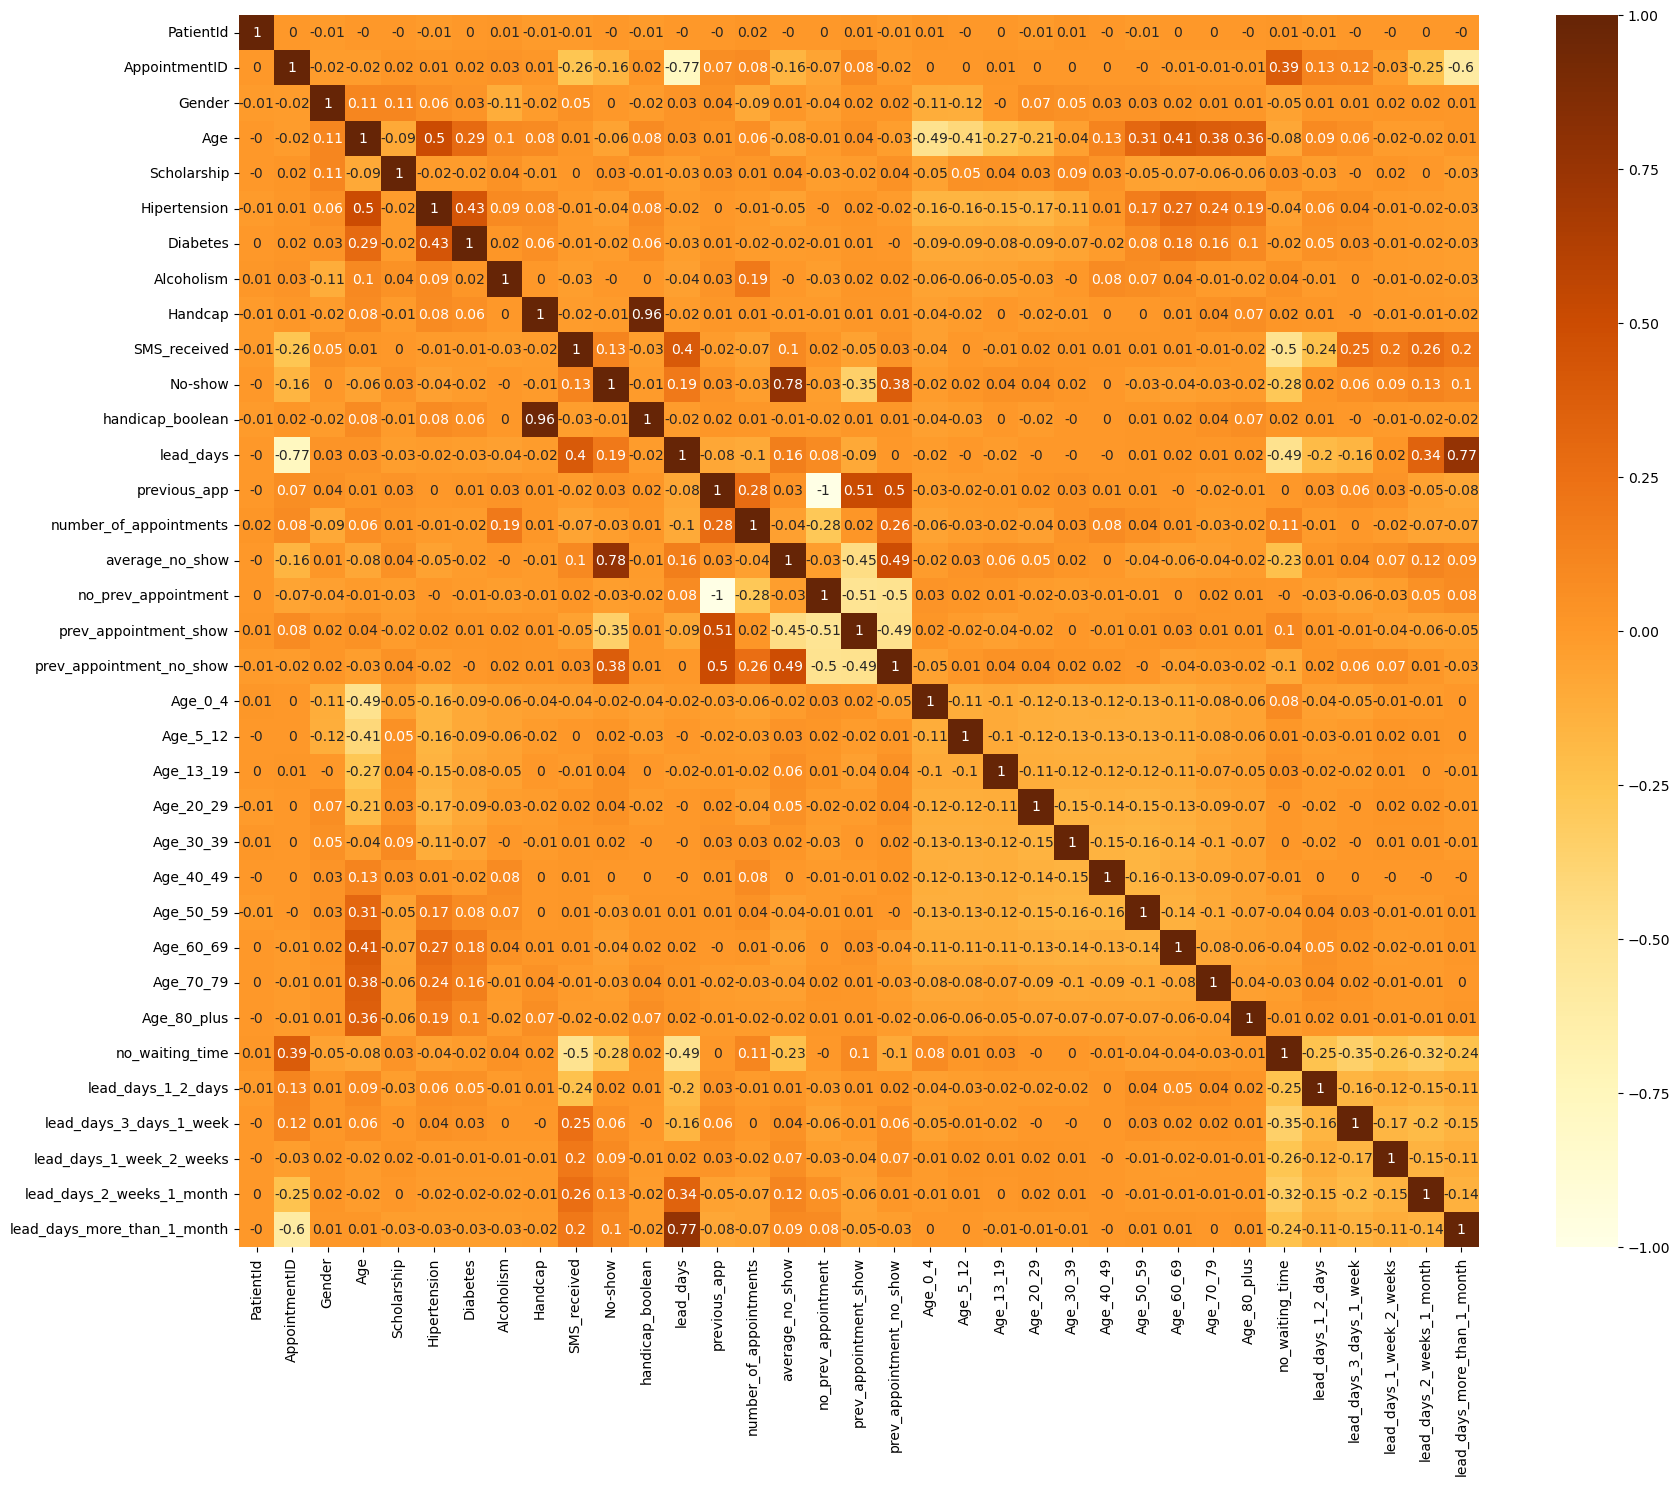

In [25]:
correlation = df.corr().round(2)
plt.figure(figsize = (20,16))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')